In [ ]:
Dataset Regresión Lineal – Vehicle dataset


Jose Miguel Cruz Segura 


#202016908_84

In [28]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
Datos = pd.read_csv('C:/Users/ASUS-PC/OneDrive/Documentos/fase3/ANÁLISIS_DE_DATOS/Anexo2 _Dataset_Vehicle/car data.csv')

In [32]:
Datos

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [22]:
Datos.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
print(Datos.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


Text(0.5, 1.0, 'Identificacion de Datos Faltantes y atipicos')

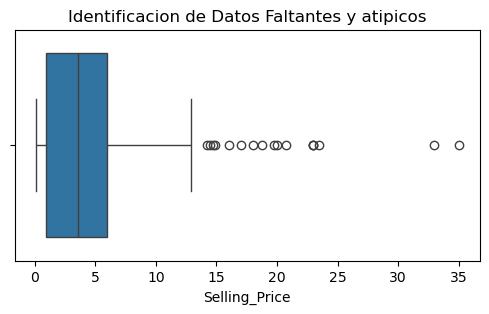

In [28]:
#Identificacion de Datos Faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Selling_Price'])
plt.title('Identificacion de Datos Faltantes y atipicos') 


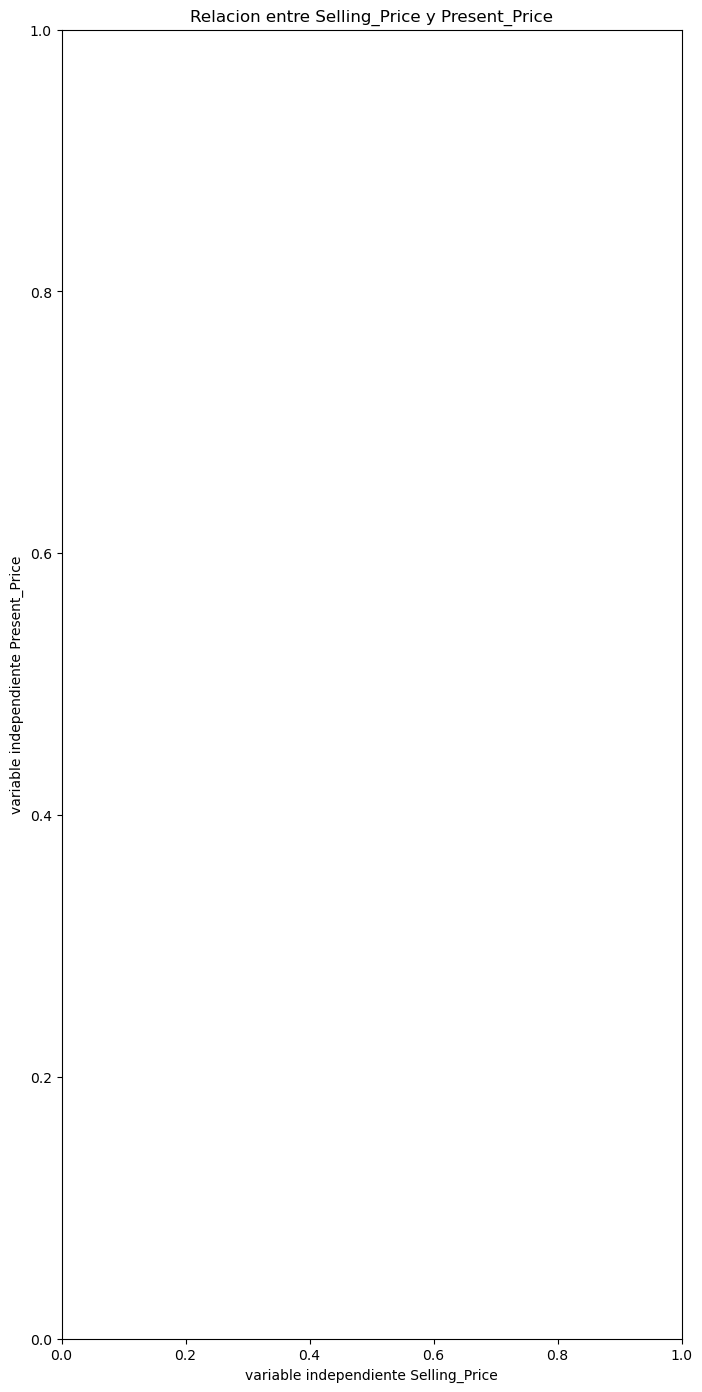

In [29]:
#Grafico de dispersion 
plt.figure(figsize=(8,17))
sns.scatterplot(Selling_Price='Selling_Price', Present_Price='Present_Price', Datos=Datos, color= 'Purple')
plt.title('Relacion entre Selling_Price y Present_Price')
plt.xlabel('variable independiente Selling_Price')
plt.ylabel('variable independiente Present_Price')
plt.show()


In [33]:
#Datos atipicos 

max_Owner = 10
min_Owner = 2
Total_Owner = ((Datos['Owner'] < min_Owner) | (Datos['Owner'] > max_Owner)).sum()

max_Present_Price = 20
min_Present_Price = 8 
Total_Present_Price = ((Datos['Present_Price'] < min_Present_Price) | (Datos['Present_Price'] > max_Present_Price)).sum()

print("Total registro dataset: {}".format(len(Datos)))
print("el total de datos atipicos para la cantidad de kms_Drive es {}".format(Total_Owner))
print("el total de datos atipicos para la cantidad de Present_Pricee es {}".format(Total_Present_Price))
print("")
Datos.info()

Total registro dataset: 301
el total de datos atipicos para la cantidad de kms_Drive es 300
el total de datos atipicos para la cantidad de Present_Pricee es 212

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
#Verificar valores faltantes 
print (Datos.isnull().sum())

#Imputar 
#Datos.fillna(Datos.mean(), inplace= True)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [36]:
# se crean variables X y Y para almacenar informacion

X = Datos.drop('Car_Name',axis=1) # se cargan los datos de train sin los datos de la columna Car_Name
Y = Datos['Car_Name'] # se cargan los datos de train con los datos de la columna Car_Name

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [37]:
print (X_train)

     Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
146  2014           0.55          0.787       15000    Petrol  Individual   
260  2016           9.15         13.600       29223    Petrol      Dealer   
37   2003           0.35          2.280      127000    Petrol  Individual   
273  2010           2.25          7.500       61203    Petrol      Dealer   
164  2016           0.45          0.540       14000    Petrol  Individual   
..    ...            ...            ...         ...       ...         ...   
251  2013           5.00          9.900       56701    Petrol      Dealer   
192  2007           0.20          0.750       49000    Petrol  Individual   
117  2015           1.10          1.900       14000    Petrol  Individual   
47   2006           1.05          4.150       65000    Petrol      Dealer   
172  2014           0.40          0.640       13700    Petrol  Individual   

    Transmission  Owner  
146       Manual      0  
260       Manual      0

In [40]:
# Convertir variables categóricas en variables numéricas mediante one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Volver a dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Entrenar el modelo de regresión logística
modelo_regresion = LogisticRegression(solver='liblinear')
modelo_regresion.fit(X_train, Y_train)

# Realizar la predicción
Prediccion = modelo_regresion.predict(X_test)


In [41]:
print (Y_test)

223                 verna
150    TVS Apache RTR 180
226             grand i10
296                  city
52                 innova
              ...        
46                   ritz
158     Honda Dream Yuga 
230                 verna
179         Honda Karizma
27                  swift
Name: Car_Name, Length: 76, dtype: object


In [43]:
print (Prediccion)

['city' 'Honda CB Hornet 160R' 'city' 'city' 'innova' 'city' 'city'
 'Bajaj Avenger 220' 'city' 'city' 'city' 'Bajaj Dominar 400' 'city'
 'city' 'city' 'city' 'city' 'city' 'city' 'Bajaj Avenger 220' 'city'
 'city' 'city' 'city' 'city' 'Honda CB Hornet 160R' 'city' 'city' 'city'
 'corolla altis' 'city' 'city' 'city' 'city' 'corolla altis' 'city' 'city'
 'city' 'city' 'city' 'ignis' 'fortuner' 'city' 'city' 'city' 'city'
 'city' 'city' 'city' 'city' 'city' 'city' 'city' 'fortuner' 'city' 'city'
 'city' 'city' 'city' 'city' 'corolla altis' 'city' 'city' 'ignis' 'city'
 'city' 'city' 'corolla altis' 'Bajaj Avenger 220' 'city' 'city' 'city'
 'Royal Enfield Classic 350' 'city' 'Activa 3g' 'city']


In [45]:
#desempeño del modelo de regresion 

print (classification_report(Y_test,Prediccion))

                           precision    recall  f1-score   support

                Activa 3g       0.00      0.00      0.00         0
                Activa 4g       0.00      0.00      0.00         1
        Bajaj Avenger 220       0.00      0.00      0.00         1
        Bajaj Dominar 400       0.00      0.00      0.00         0
     Bajaj Pulsar  NS 200       0.00      0.00      0.00         1
         Bajaj Pulsar 150       0.00      0.00      0.00         2
      Bajaj Pulsar NS 200       0.00      0.00      0.00         1
             Hero Extreme       0.00      0.00      0.00         1
   Hero Honda CBZ extreme       0.00      0.00      0.00         1
         Hero Passion Pro       0.00      0.00      0.00         1
     Honda CB Hornet 160R       0.00      0.00      0.00         0
           Honda CB Shine       0.00      0.00      0.00         1
            Honda CBR 150       0.00      0.00      0.00         1
        Honda Dream Yuga        0.00      0.00      0.00     

C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS-PC\anaconda3\Lib\site-packag

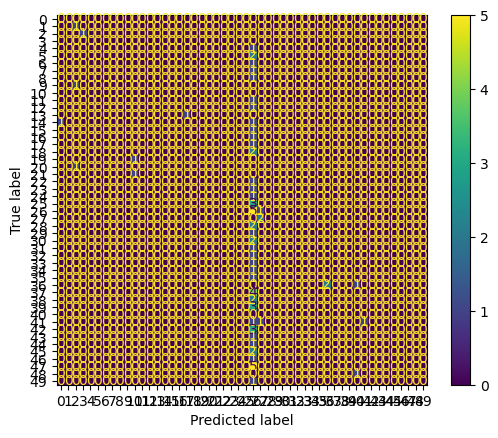

In [47]:
#Matrix de confusion de modelo
from sklearn import metrics  # Importar metrics desde sklearn

# Matriz de confusión del modelo
cm = confusion_matrix(Y_test, Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
#Curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 5 is present in all training examples.
  warnings.warn(
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 22 is present in all training examples.
  warnings.warn(
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 31 is present in all training examples.
  warnings.warn(
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 36 is present in all training examples.
  warnings.warn(
C:\Users\ASUS-PC\anaconda3\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 50

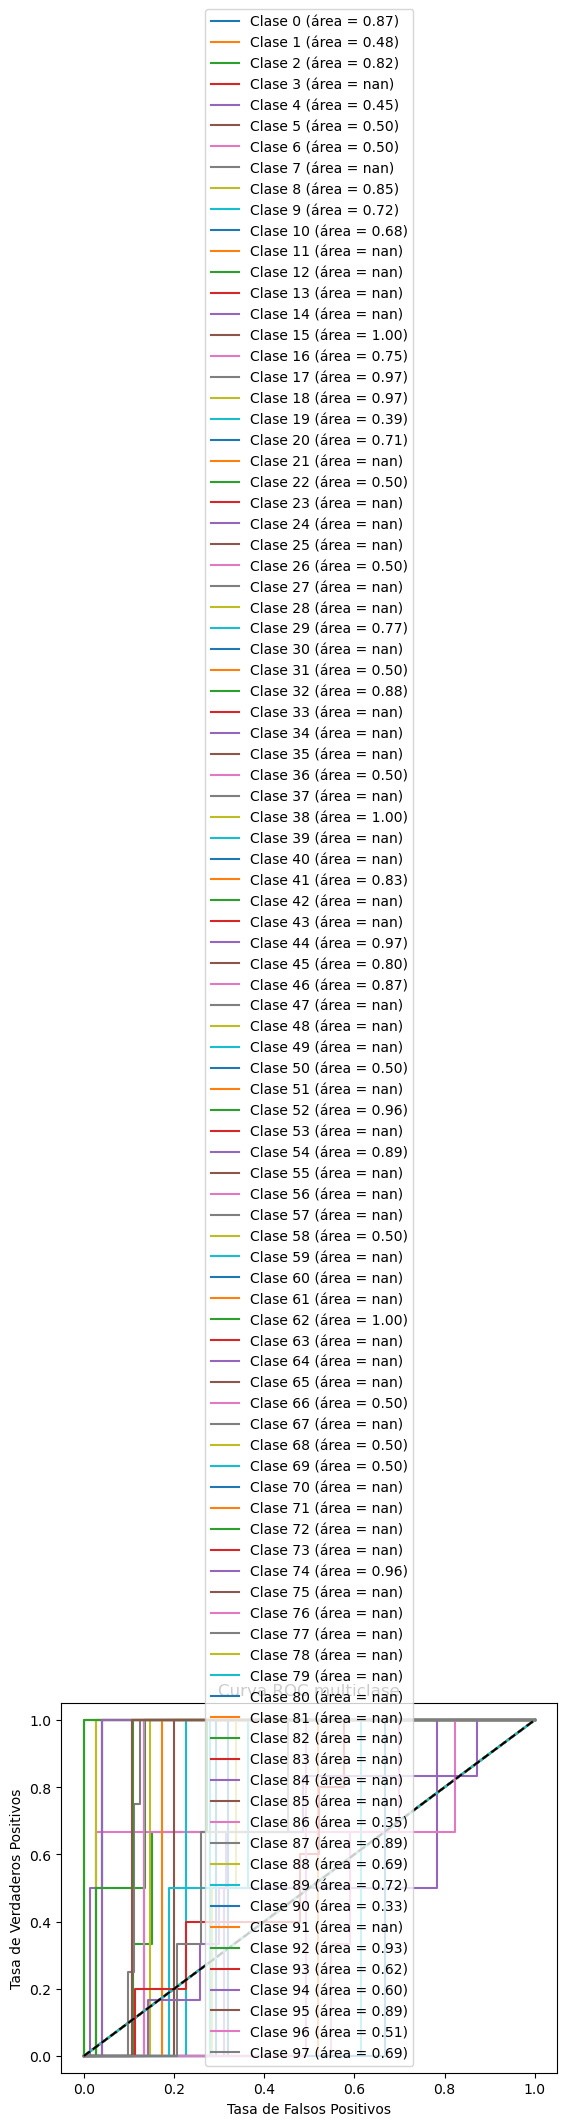

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Binarizar las etiquetas de clase
Y_binarized = label_binarize(Y, classes=Y.unique())
n_classes = Y_binarized.shape[1]

# Dividir los datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binarized, test_size=0.25, random_state=0)

# Entrenar modelo en esquema one-vs-rest
modelo_regresion = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
modelo_regresion.fit(X_train, Y_train)

# Predecir las probabilidades
Y_score = modelo_regresion.decision_function(X_test)

# Graficar la curva ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

plt.figure()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Clase {i} (área = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC multiclase")
plt.legend(loc="best")
plt.show()
